## Collecting and Arranging the Data

In [1]:
import yfinance as yf
import pandas as pd

def download_and_combine(tickers, period='20y'):
    all_data = []

    for ticker in tickers:
        # Download data
        df = yf.download([ticker], period=period, group_by='Ticker')

        # Flatten MultiIndex columns
        df.columns = [col[1] for col in df.columns]

        # Add ticker column
        df['ticker'] = ticker

        # Store for combining
        all_data.append(df)

    # Combine all tickers into one dataframe
    combined_df = pd.concat(all_data).reset_index()

    return combined_df

tickers = ['AAPL', 'MSFT', 'GOOGL']
df = download_and_combine(tickers)

df


/tmp/ipython-input-521353212.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download([ticker], period=period, group_by='Ticker')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-521353212.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download([ticker], period=period, group_by='Ticker')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-521353212.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download([ticker], period=period, group_by='Ticker')
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume,ticker
0,2005-11-21,1.944020,1.955116,1.911029,1.948219,511711200,AAPL
1,2005-11-22,1.944618,2.002202,1.935022,1.995003,540282400,AAPL
2,2005-11-23,2.005801,2.038791,2.000103,2.012699,485853200,AAPL
3,2005-11-25,2.029194,2.085576,2.024395,2.079579,395012800,AAPL
4,2005-11-28,2.120966,2.131463,2.071481,2.089175,1018519600,AAPL
...,...,...,...,...,...,...,...
15088,2025-11-13,282.339996,282.839996,277.239990,278.570007,29494000,GOOGL
15089,2025-11-14,271.410004,278.559998,270.700012,276.410004,31647200,GOOGL
15090,2025-11-17,285.779999,293.950012,283.570007,285.019989,52670200,GOOGL
15091,2025-11-18,287.920013,288.799988,278.200012,284.279999,49158700,GOOGL


## Visualizing the Data

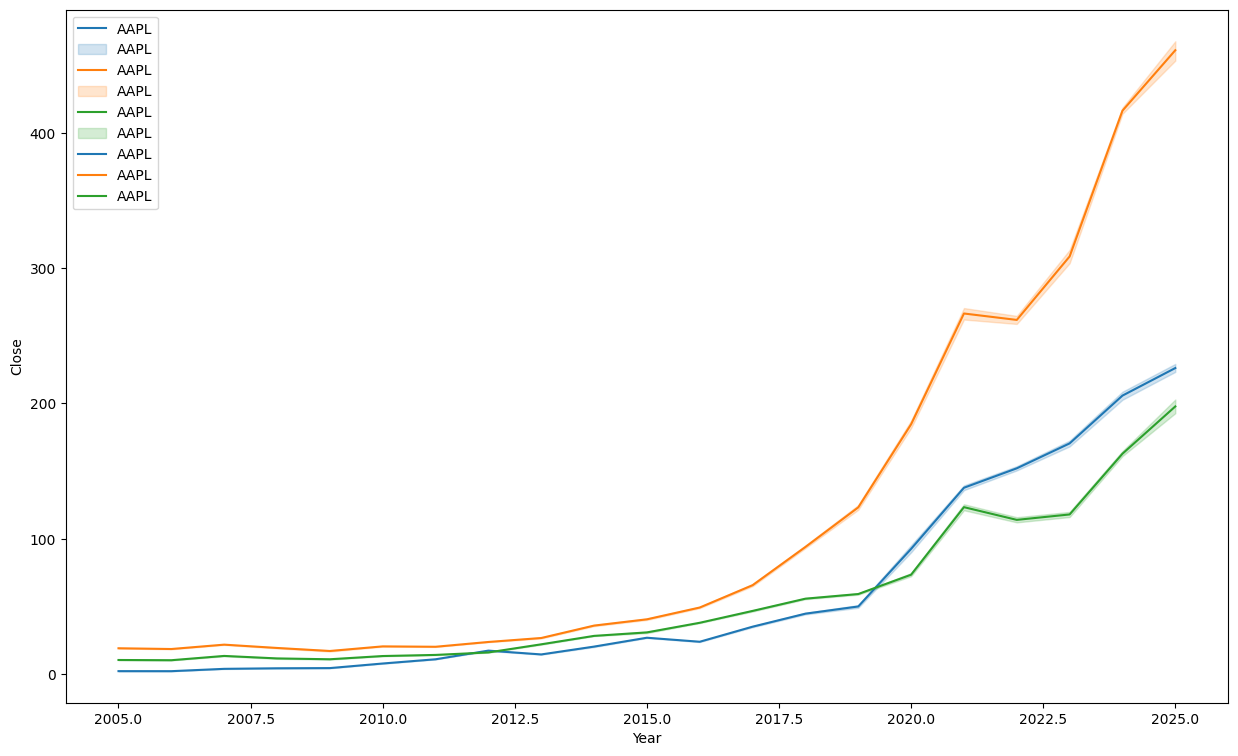

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1['Year'] = pd.to_datetime(df1['Date']).dt.year


plt.figure(figsize=(15,9))
sns.lineplot(data=df1,x='Year',y='Close',hue='ticker')
plt.legend(df1['ticker'])

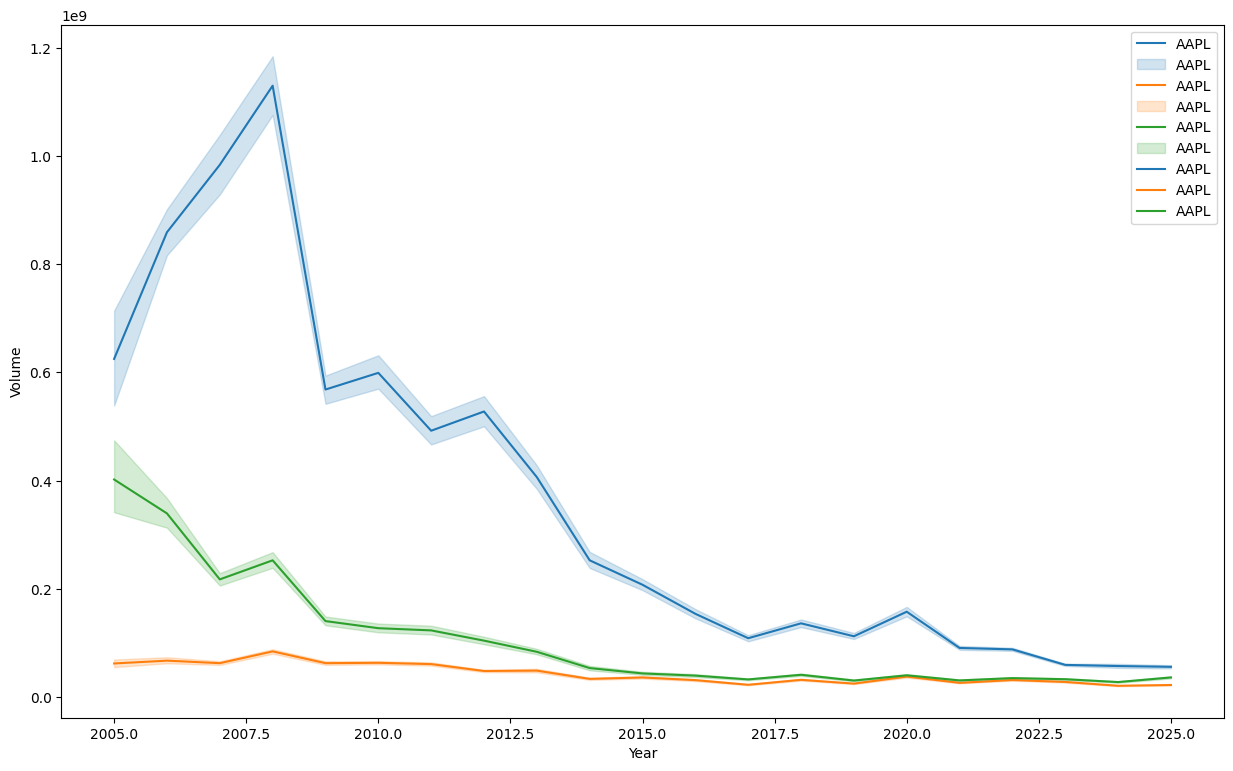

In [3]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df1,x='Year',y='Volume',hue='ticker')
plt.legend(df1['ticker'])

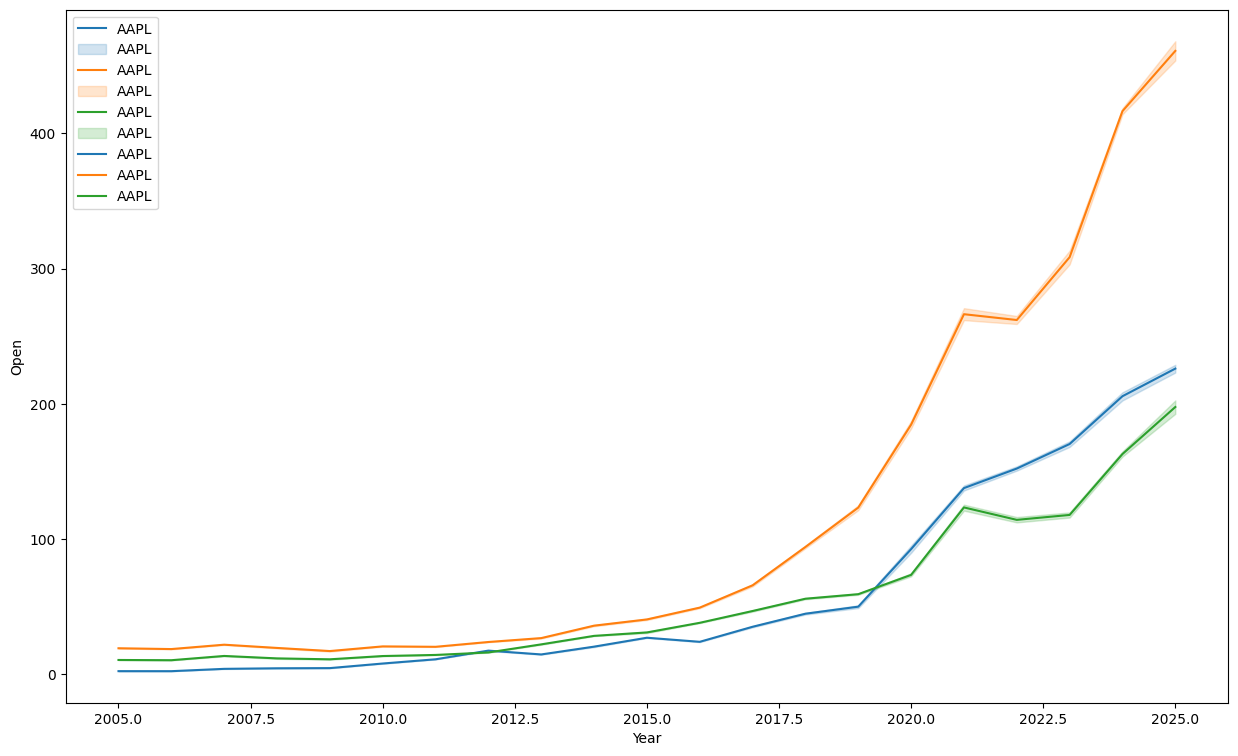

In [4]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df1,x='Year',y='Open',hue='ticker')
plt.legend(df1['ticker'])

## Feature Engineering

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df2 = df.copy()
le = LabelEncoder()

df2['ticker'] = le.fit_transform(df2['ticker'])
df2

,Date,Open,High,Low,Close,Volume,ticker
0,2005-11-21,1.944020,1.955116,1.911029,1.948219,511711200,0
1,2005-11-22,1.944618,2.002202,1.935022,1.995003,540282400,0
2,2005-11-23,2.005801,2.038791,2.000103,2.012699,485853200,0
3,2005-11-25,2.029194,2.085576,2.024395,2.079579,395012800,0
4,2005-11-28,2.120966,2.131463,2.071481,2.089175,1018519600,0
...,...,...,...,...,...,...,...
15088,2025-11-13,282.339996,282.839996,277.239990,278.570007,29494000,1
15089,2025-11-14,271.410004,278.559998,270.700012,276.410004,31647200,1
15090,2025-11-17,285.779999,293.950012,283.570007,285.019989,52670200,1
15091,2025-11-18,287.920013,288.799988,278.200012,284.279999,49158700,1


In [11]:
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day

df2 = df2.drop(['Date'],axis=1)
df2

,Open,High,Low,Close,Volume,ticker,Year,Month,Day
0,1.944020,1.955116,1.911029,1.948219,511711200,0,2005,11,21
1,1.944618,2.002202,1.935022,1.995003,540282400,0,2005,11,22
2,2.005801,2.038791,2.000103,2.012699,485853200,0,2005,11,23
3,2.029194,2.085576,2.024395,2.079579,395012800,0,2005,11,25
4,2.120966,2.131463,2.071481,2.089175,1018519600,0,2005,11,28
...,...,...,...,...,...,...,...,...,...
15088,282.339996,282.839996,277.239990,278.570007,29494000,1,2025,11,13
15089,271.410004,278.559998,270.700012,276.410004,31647200,1,2025,11,14
15090,285.779999,293.950012,283.570007,285.019989,52670200,1,2025,11,17
15091,287.920013,288.799988,278.200012,284.279999,49158700,1,2025,11,18


In [12]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = df2.drop(['Close'],axis=1)
y = df2.Close

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.score(X_test,y_test)

0.9999440165735879